In [2]:
# Impor library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt

# 1. Tampilkan dataset CSV
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 2. Tampilkan jumlah baris dan kolom pada dataset
jumlah_baris, jumlah_kolom = df.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 891
Jumlah Kolom: 12


In [4]:
# 3. Ambil dataset kolom fitur (Name, Sex, Age, Pclass, Fare) dan tampilkan
fitur = df[['Name', 'Sex', 'Age', 'Pclass', 'Fare']]
fitur.head()

,Name,Sex,Age,Pclass,Fare
0,"Braund, Mr. Owen Harris",male,22.0,3,7.2500
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,71.2833
2,"Heikkinen, Miss. Laina",female,26.0,3,7.9250
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,53.1000
4,"Allen, Mr. William Henry",male,35.0,3,8.0500


In [5]:
# 4. Ambil dataset kolom kelas (Survived) dan tampilkan
kelas = df[['Survived']]
kelas.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [6]:
# 5. Data + fitur Relatives (jumlah akumulasi dari kolom fitur SibSp+Parch dari dataset) dan tampilkan
df['Relatives'] = df['SibSp'] + df['Parch']
data_fitur_relatives = df[['Name', 'Sex', 'Age', 'Pclass', 'Fare', 'Relatives']]
data_fitur_relatives.head()

,Name,Sex,Age,Pclass,Fare,Relatives
0,"Braund, Mr. Owen Harris",male,22.0,3,7.2500,1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,71.2833,1
2,"Heikkinen, Miss. Laina",female,26.0,3,7.9250,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,53.1000,1
4,"Allen, Mr. William Henry",male,35.0,3,8.0500,0


In [7]:
# 6. Hitung berapa penumpang pada masing-masing nilai Pclass
jumlah_penumpang_per_pclass = df['Pclass'].value_counts()
print("Jumlah Penumpang per Pclass:")
print(jumlah_penumpang_per_pclass)

Jumlah Penumpang per Pclass:
3    491
1    216
2    184
Name: Pclass, dtype: int64


In [8]:
# 7. Hitung berapa penumpang pada masing-masing nilai Sex
jumlah_penumpang_per_sex = df['Sex'].value_counts()
print("\nJumlah Penumpang per Sex:")
print(jumlah_penumpang_per_sex)


Jumlah Penumpang per Sex:
male      577
female    314
Name: Sex, dtype: int64


In [9]:
# 8. Hitung berapa penumpang yang tidak selamat (Survived=0) dan selamat (Survived=1) untuk masing-masing Pclass
selamat_per_pclass = df[df['Survived'] == 1]['Pclass'].value_counts()
tidak_selamat_per_pclass = df[df['Survived'] == 0]['Pclass'].value_counts()
print("\nJumlah Penumpang Selamat per Pclass:")
print(selamat_per_pclass)
print("\nJumlah Penumpang Tidak Selamat per Pclass:")
print(tidak_selamat_per_pclass)


Jumlah Penumpang Selamat per Pclass:
1    136
3    119
2     87
Name: Pclass, dtype: int64

Jumlah Penumpang Tidak Selamat per Pclass:
3    372
2     97
1     80
Name: Pclass, dtype: int64


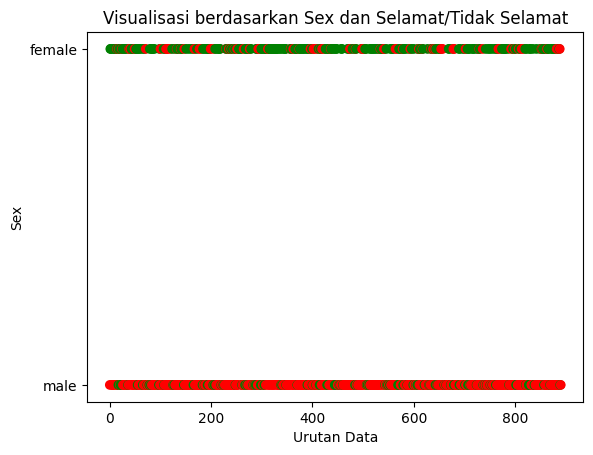

In [10]:
# 9. Visualisasi dengan warna yang berbeda untuk class dimana sumbu x=urutan data dan sumbu y=Sex
df['Survived'] = df['Survived'].map({0: 'Tidak Selamat', 1: 'Selamat'})
plt.scatter(df.index, df['Sex'], c=df['Survived'].map({'Tidak Selamat': 'red', 'Selamat': 'green'}))
plt.xlabel('Urutan Data')
plt.ylabel('Sex')
plt.title('Visualisasi berdasarkan Sex dan Selamat/Tidak Selamat')
plt.show()

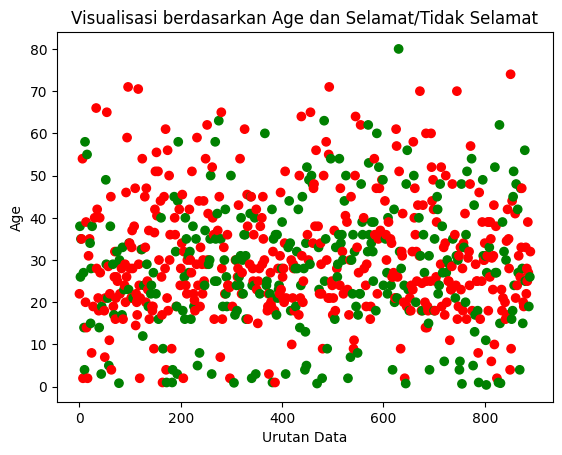

In [11]:
# 10. Visualisasi dengan warna yang berbeda untuk class dimana sumbu x=urutan data dan sumbu y=Age (abaikan data yang terdapat missing value)
df_age_clean = df.dropna(subset=['Age'])
plt.scatter(df_age_clean.index, df_age_clean['Age'], c=df_age_clean['Survived'].map({'Tidak Selamat': 'red', 'Selamat': 'green'}))
plt.xlabel('Urutan Data')
plt.ylabel('Age')
plt.title('Visualisasi berdasarkan Age dan Selamat/Tidak Selamat')
plt.show()